##### Import train.csv

In [2]:
# Import the dataset and see it
import pandas as pd
df = pd.read_csv('./contest_public/train.csv')
df.head(4)

,event_country_code,batt_manufacturer,installed_count,batt_instance,cycle_count,temperature,battery_current,design_capacity,full_charge_capacity,remaining_capacity,design_voltage,batt_voltage,cell_voltage1,cell_voltage2,cell_voltage3,cell_voltage4,status_register,risk
0,IV,33-24,1,primary,335,36,62999,4450,3473,1605,11400,12535,0,3457,3458,3447,192,-1
1,JP,333-2B-0F,1,primary,16,22,63291,5200,4827,1801,7700,12535,0,0,3498,3512,192,-1
2,US,333-1C-2F,1,primary,16,28,0,4080,3851,3707,11400,12535,0,4265,4265,4264,224,-1
3,US,13-42,1,primary,371,20,237,4450,3293,3018,11400,12535,0,4325,4274,4277,128,-1


In [4]:
df['installed_count'].unique()

array([1, 2])

In [5]:
# Check if there is NaN values. Apparently not. At least not coded as NaN.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86954 entries, 0 to 86953
Data columns (total 18 columns):
event_country_code      86954 non-null object
batt_manufacturer       86954 non-null object
installed_count         86954 non-null int64
batt_instance           86954 non-null object
cycle_count             86954 non-null int64
temperature             86954 non-null int64
battery_current         86954 non-null int64
design_capacity         86954 non-null int64
full_charge_capacity    86954 non-null int64
remaining_capacity      86954 non-null int64
design_voltage          86954 non-null int64
batt_voltage            86954 non-null int64
cell_voltage1           86954 non-null int64
cell_voltage2           86954 non-null int64
cell_voltage3           86954 non-null int64
cell_voltage4           86954 non-null int64
status_register         86954 non-null int64
risk                    86954 non-null int64
dtypes: int64(15), object(3)
memory usage: 11.9+ MB


In [6]:
# Check the ranges for each variable. Definitely some scaling will be required.
df.describe()

,installed_count,cycle_count,temperature,battery_current,design_capacity,full_charge_capacity,remaining_capacity,design_voltage,batt_voltage,cell_voltage1,cell_voltage2,cell_voltage3,cell_voltage4,status_register,risk
count,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000,86954.000000
mean,1.004865,163.042528,29.305242,17554.370357,4057.864745,3651.617223,3069.510040,11398.079789,12534.922120,303.895048,3928.965085,4089.479782,4055.003956,1485.880132,43.578927
std,0.069578,157.054658,4.750972,28454.219297,1123.447969,1270.159188,1346.188191,1208.573139,8.406005,1071.784932,830.367850,284.959325,446.065275,5800.829904,101.062957
min,1.000000,0.000000,0.000000,0.000000,2500.000000,1.000000,0.000000,3800.000000,11289.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,1.000000,35.000000,26.000000,0.000000,4080.000000,3323.000000,1998.000000,11100.000000,12535.000000,0.000000,3921.000000,3968.000000,3954.000000,192.000000,-1.000000
50%,1.000000,97.000000,29.000000,173.000000,4080.000000,3799.000000,3362.000000,11400.000000,12535.000000,0.000000,4143.000000,4152.000000,4154.000000,224.000000,-1.000000
75%,1.000000,309.000000,32.000000,63343.000000,4450.000000,3978.000000,3790.000000,11400.000000,12535.000000,0.000000,4273.000000,4279.000000,4278.000000,224.000000,0.000000
max,2.000000,983.000000,55.000000,65433.000000,79538.000000,79538.000000,27114.000000,15551.000000,12554.000000,4398.000000,4398.000000,4400.000000,4399.000000,49376.000000,440.000000


Found 65142 instances (74.9%) with risk==-1.
        
Found 2665 instances (3.1%) with risk==0. 
        
Found 19147 instances (22.0%) with risk!=0 and risk !=-1


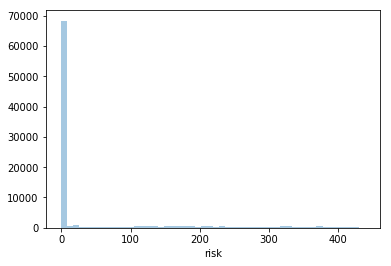

In [23]:
# Import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
# Import seaborn
import seaborn as sns
# Show distribution plot of ROI
sns.distplot(df['risk'], kde=False)
# Count proportion of risk 0 to
n_samples = len(df['risk'])
risk_0 = len(df[df['risk'] == 0])
risk_minus_1 = len(df[df['risk'] == -1])
risk_else = n_samples - risk_0 - risk_minus_1
print('''Found {0} instances ({1:.1%}) with risk==-1.
        \nFound {2} instances ({3:.1%}) with risk==0. 
        \nFound {4} instances ({5:.1%}) with risk!=0 and risk !=-1'''
      .format(risk_minus_1, risk_minus_1/n_samples, risk_0, risk_0/n_samples, risk_else, risk_else/n_samples)
     )